## Load important words

In [1]:
import pickle

name = 'lime_dict_train'
with open('../Data_and_Models/' + name + '.pkl', 'rb') as f:
    word_dict = pickle.load(f)
    
import numpy as np
num_wanted = 20
imp_word_dict = {}

print(len(word_dict))

new_dict = word_dict.copy()

for keys in word_dict.keys():
    if isinstance(word_dict[keys], float):
        new_dict.pop(keys)
    elif len(word_dict[keys]) < 5:
        new_dict.pop(keys)
        
print(len(new_dict))

for i in range(num_wanted):
    #this is convoluted because words that have only been seen once are irratic
    max_key = max(new_dict.keys(), key=(lambda x: abs(np.mean(new_dict[x]))))
    imp_word_dict[max_key] = np.mean(new_dict[max_key])
    new_dict.pop(max_key, None)
    

2721
409


## Visualize words

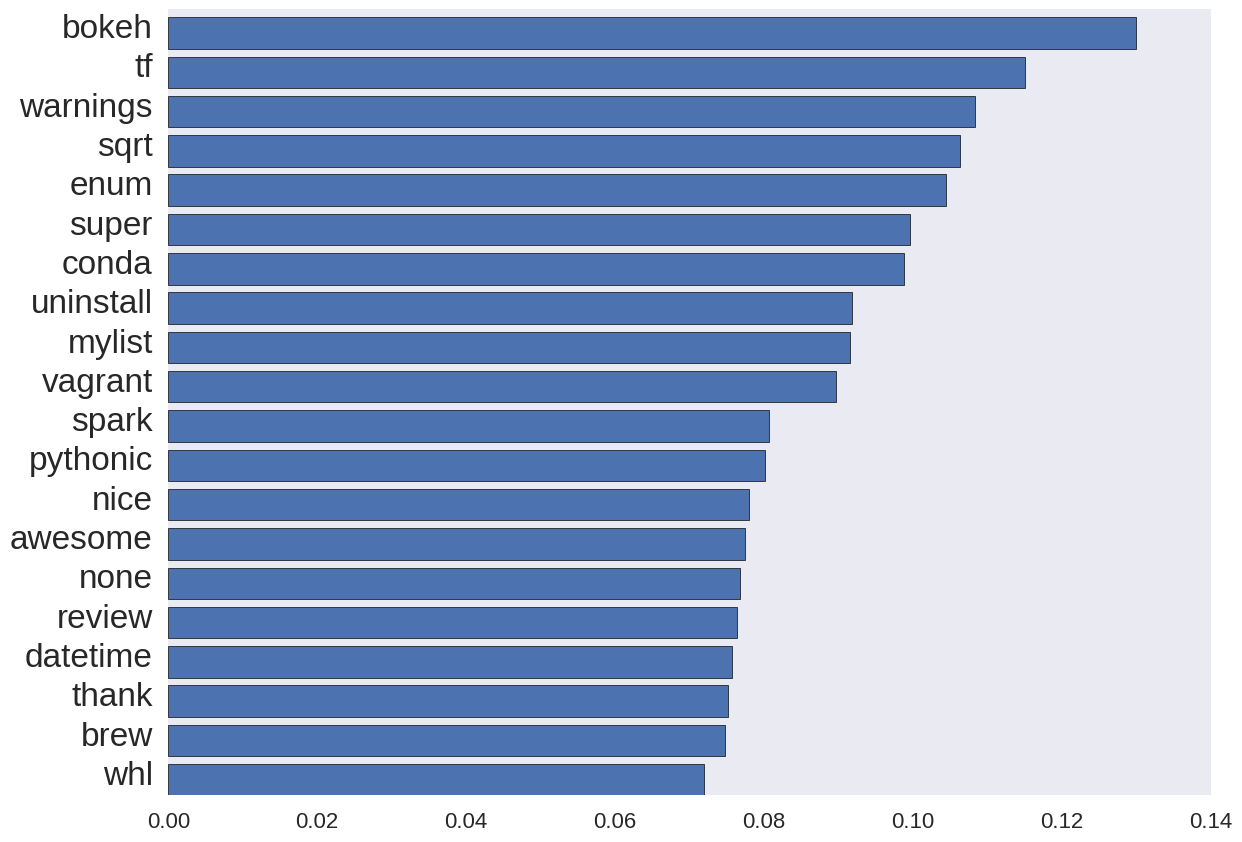

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")
sns.set_style("dark")

sorted_x = sorted(imp_word_dict, key=imp_word_dict.get)
sorted_y = [imp_word_dict[x] for x in sorted_x]

plt.barh(range(len(sorted_x)), sorted_y)
plt.yticks(np.arange(len(sorted_x))+0.5, sorted_x)
plt.tick_params(axis='y', which='major', labelsize=24)

plt.tight_layout()
plt.savefig('importwords.svg')
plt.show()